# Machine learning advance regression
## Surprise Housing (Australia Business Expansion) Case Study

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

Essentially, What company wants —

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not

#### Approach:

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not..

- To know the accuracy of the model, i.e. To predict to decide whether to invest in them or not.

In [3255]:
#Suppress/Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3256]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#Regression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [3257]:
#loaddata
raw_df=pd.read_csv("train.csv")

### Understanding data and Exploratory data analysis
#### Understanding data

In [3258]:
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3259]:
raw_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3260]:
# Number of columns and rows
print('---------SHAPE------------')
print(raw_df.shape)
print('---------COLUMNS------------')
print(raw_df.columns)

---------SHAPE------------
(1460, 81)
---------COLUMNS------------
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'Garage

In [3261]:
# dataset along with type
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3262]:
# If there is null present
raw_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [3263]:
#Check missing values
raw_df.isnull().sum()[raw_df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [3264]:
# drop all columns which most of values are null/empty
clean_df = raw_df.loc[:,(100*raw_df.isnull().sum()/raw_df.shape[0]).sort_values(ascending = False) < 30]
clean_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Missing value imputation

In [3265]:
#check Missing values of columns in clean dataset after droping
clean_df.isnull().sum()[clean_df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [3266]:
columns_with_null=['MasVnrArea','LotFrontage','BsmtQual','MasVnrType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'];

clean_df[columns_with_null].nunique()


MasVnrArea      327
LotFrontage     110
BsmtQual          4
MasVnrType        4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Electrical        5
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageQual        5
GarageCond        5
dtype: int64

In [3267]:
# Before imputation let's take a look into data summary for categorical variables
clean_df[['BsmtQual','MasVnrType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'Electrical','GarageType','GarageFinish','GarageQual','GarageCond']].describe()

,BsmtQual,MasVnrType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
count,1423,1452,1423,1422,1423,1422,1459,1379,1379,1379,1379
unique,4,4,4,4,6,6,5,6,3,5,5
top,TA,None,TA,No,Unf,Unf,SBrkr,Attchd,Unf,TA,TA
freq,649,864,1311,953,430,1256,1334,870,605,1311,1326


In [3268]:
print(clean_df.BsmtQual.value_counts())
print(clean_df.BsmtCond.value_counts())
print(clean_df.GarageFinish.value_counts())
print(clean_df.GarageQual.value_counts())
print(clean_df.GarageType.value_counts())
print(clean_df.GarageCond.value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [3269]:
# Data imputation 

clean_df.BsmtQual = clean_df.BsmtQual.fillna('Unknown') # Evaluates the height of the basement null replace with 'Unknown' since value are evenly distributed
clean_df.MasVnrType = clean_df.MasVnrType.fillna(clean_df.MasVnrType.mode()[0]) # Masonry veneer type null replace with most frequent
clean_df.BsmtCond = clean_df.BsmtCond.fillna(clean_df.BsmtCond.mode()[0]) # Evaluates the general condition of the basement if null replace with NA (No basement)
clean_df.BsmtExposure = clean_df.BsmtExposure.fillna('Unknown') # Refers to walkout or garden level walls if null replace with No (No Garden)
clean_df.BsmtFinType1 = clean_df.BsmtFinType1.fillna('Unknown') # Rating of basement finished area if null replace with Unknown
clean_df.BsmtFinType2 = clean_df.BsmtFinType2.fillna('Unknown') # Rating of basement finished area (if multiple types) if null replace with Unknown
clean_df.Electrical = clean_df.Electrical.fillna(clean_df.Electrical.mode()[0]) # Electrical system if null then replace with the max occurance (Mode)
clean_df.GarageType = clean_df.GarageType.fillna(clean_df.GarageType.mode()[0]) # Garage location null replace with NA
clean_df.GarageFinish = clean_df.GarageFinish.fillna(clean_df.GarageFinish.mode()[0])  # Interior finish of the garage null replace with most frequent
clean_df.GarageQual = clean_df.GarageQual.fillna(clean_df.GarageQual.mode()[0]) # Garage quality null replace with most frequent
clean_df.GarageCond = clean_df.GarageCond.fillna(clean_df.GarageCond.mode()[0]) # Garage condition null replace with with most frequent

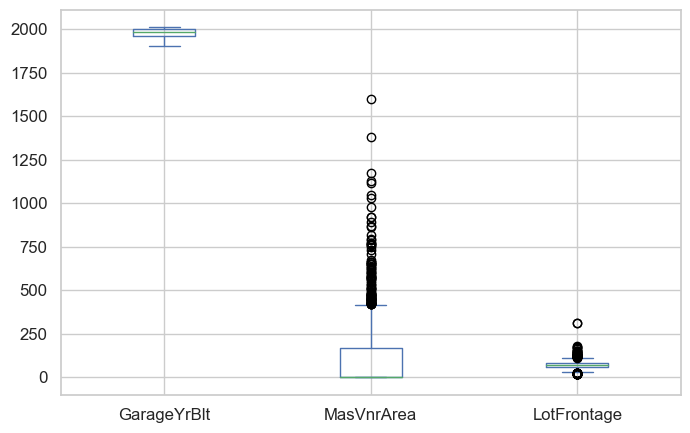

In [3270]:
# Imputing numerical variable(s)

# check if there is outliers
clean_df[['GarageYrBlt','MasVnrArea','LotFrontage']].plot(kind='box')
plt.show()

In [3271]:
# Based above plot (Mean if no outlier and Median in case of outlier)
clean_df.GarageYrBlt = clean_df.GarageYrBlt.fillna(clean_df.GarageYrBlt.mean())  # Year garage was built null replace with 
clean_df.MasVnrArea = clean_df.MasVnrArea.fillna(clean_df.MasVnrArea.median()) # Masonry veneer area in square feet null replace with median of MasVnrArea
clean_df.LotFrontage = clean_df.LotFrontage.fillna(clean_df.LotFrontage.median()) # Linear feet of street connected to property null replace with Median


In [3272]:
# Checking missing value if all is settled
clean_df.isnull().sum()[clean_df.isnull().sum()>0]

Series([], dtype: int64)

#### Exploratory data analysis

In [3273]:
from datetime import date

# Calculate age of house
todays_date = date.today()
currentYear= todays_date.year

clean_df['House_Age_yr'] = clean_df.YrSold - clean_df.YearRemodAdd
clean_df['House_Actual_Age_yr'] = clean_df.YrSold - clean_df.YearBuilt

In [3274]:
# Drop columns which may not require
clean_df=clean_df.drop(columns=['Id','YrSold','MoSold', 'YearBuilt','YearRemodAdd'])

In [3275]:
#All columns
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   Street               1460 non-null   object 
 5   LotShape             1460 non-null   object 
 6   LandContour          1460 non-null   object 
 7   Utilities            1460 non-null   object 
 8   LotConfig            1460 non-null   object 
 9   LandSlope            1460 non-null   object 
 10  Neighborhood         1460 non-null   object 
 11  Condition1           1460 non-null   object 
 12  Condition2           1460 non-null   object 
 13  BldgType             1460 non-null   object 
 14  HouseStyle           1460 non-null   object 
 15  OverallQual          1460 non-null   i

In [3276]:
num_features = clean_df.dtypes[clean_df.dtypes != "object"].index
num_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'House_Age_yr',
       'House_Actual_Age_yr'],
      dtype='object')

##### Univariate analysis

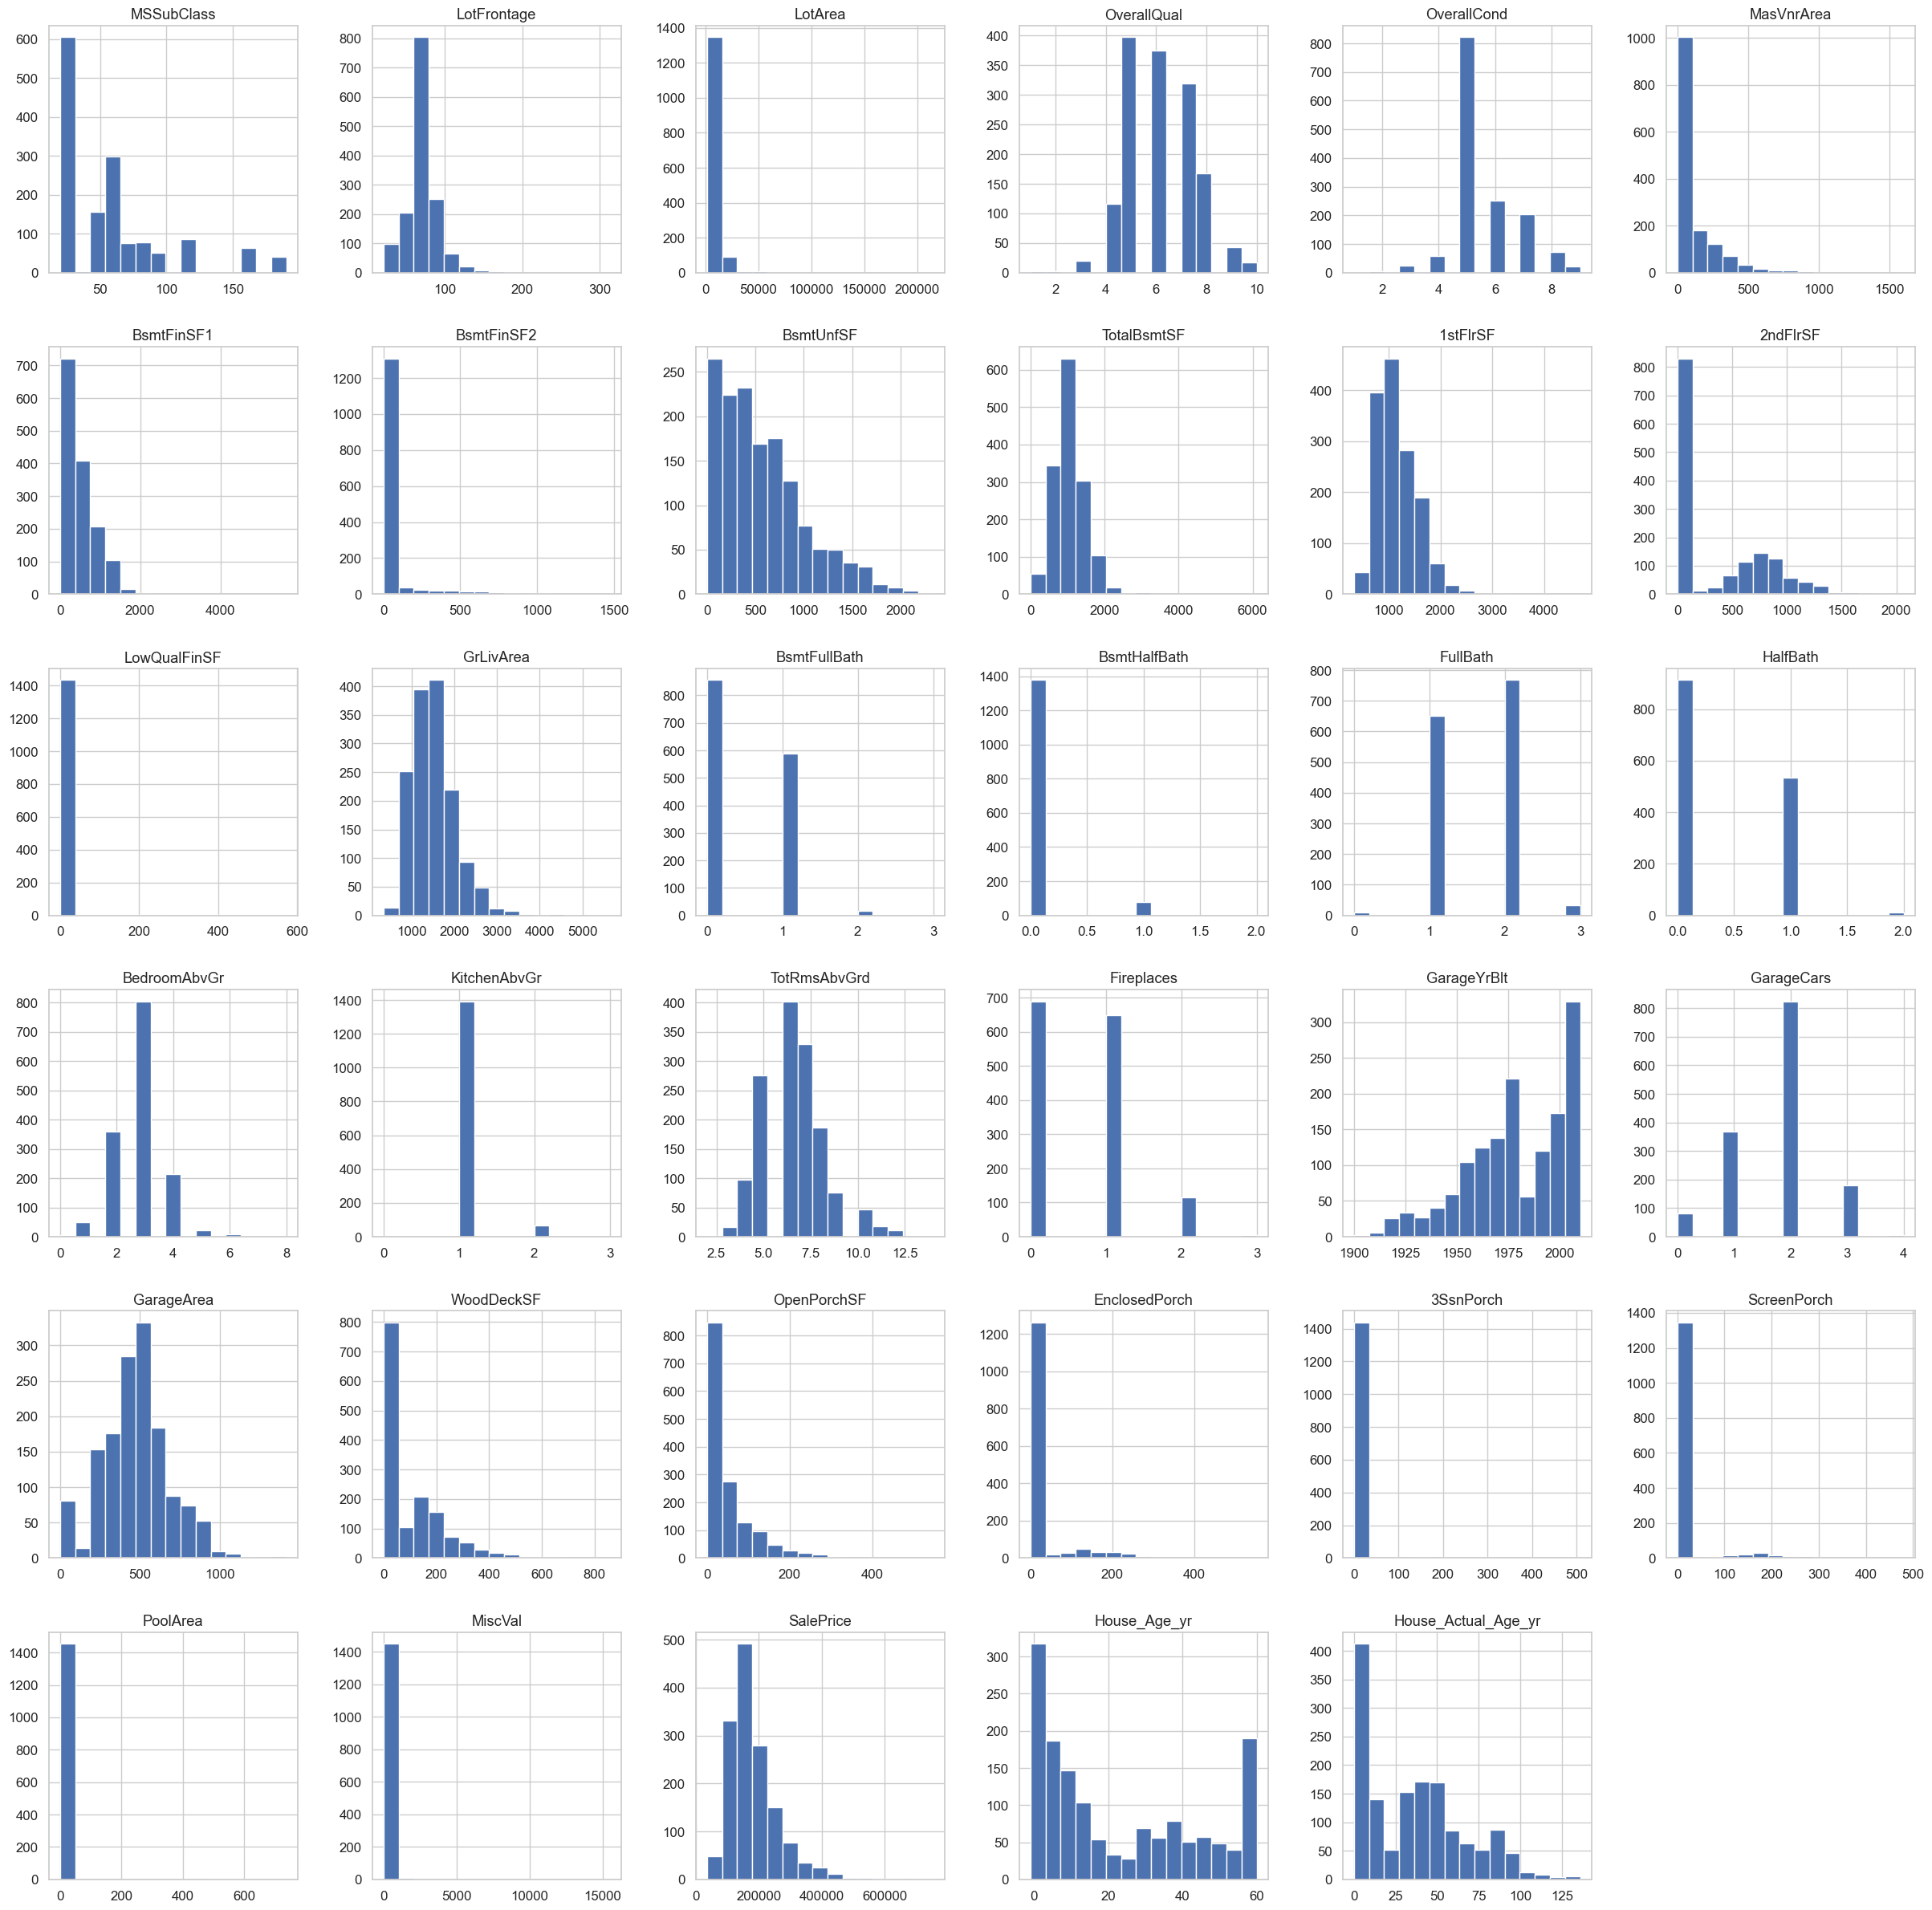

In [3277]:
clean_df[num_features].hist(bins=15, figsize=(30, 30))
plt.show()

##### Some variables (Predictors) are not evenly distributed, hence univariant anaysis may not feasible or sufficient

In [3278]:
# find correlation between varibles with SalesPrice (Response variable)
cor = clean_df.corr()
corr_coef = cor[abs(cor['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852
FullBath               0.560664
TotRmsAbvGrd           0.533723
House_Age_yr          -0.509079
House_Actual_Age_yr   -0.523350
Name: SalePrice, dtype: float64


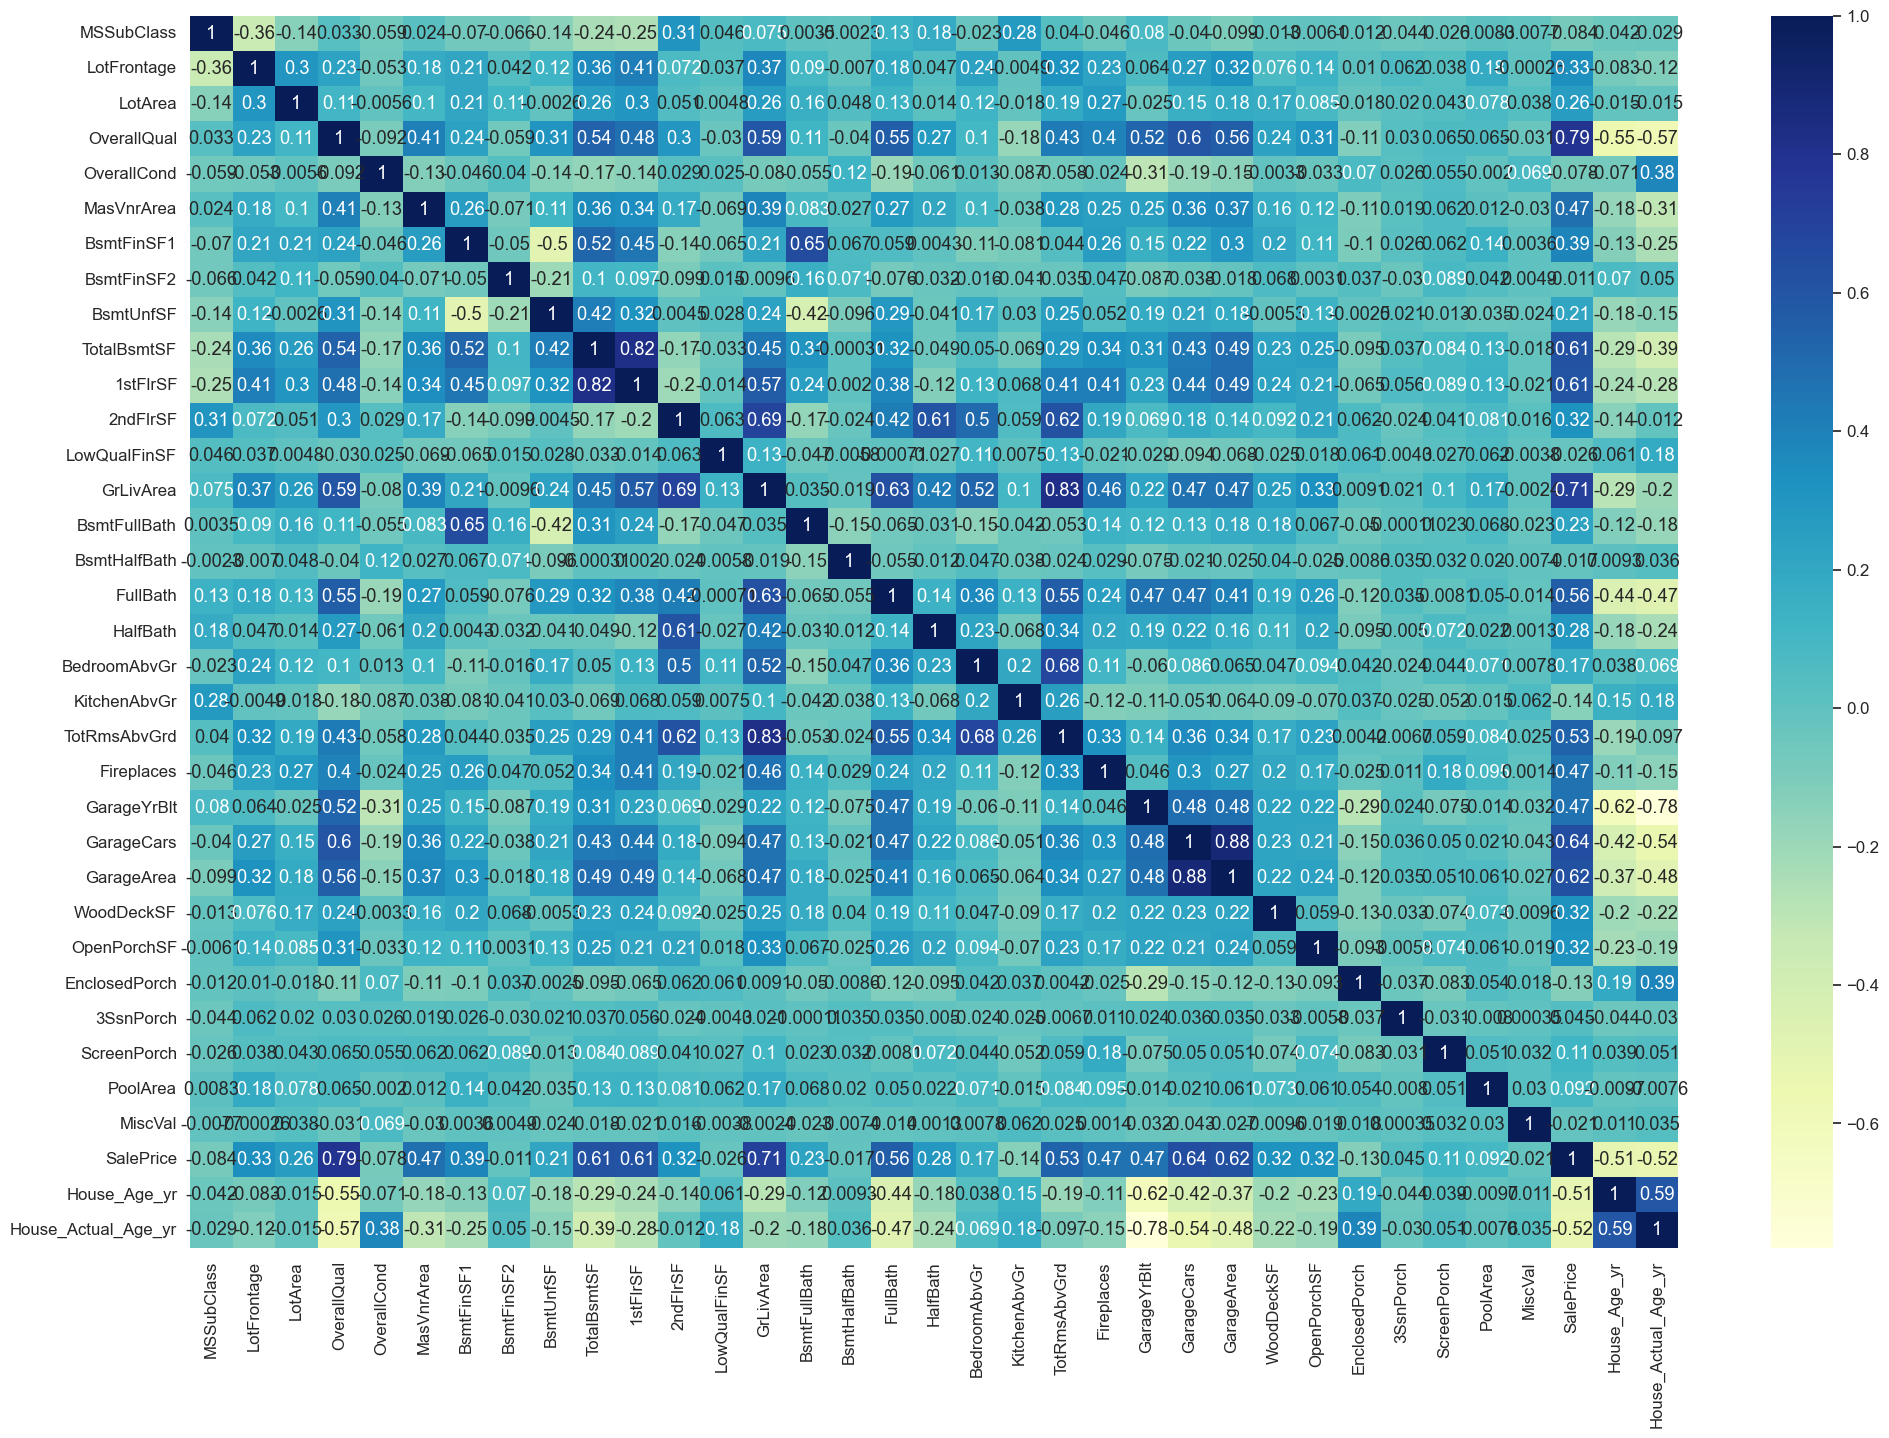

In [3279]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

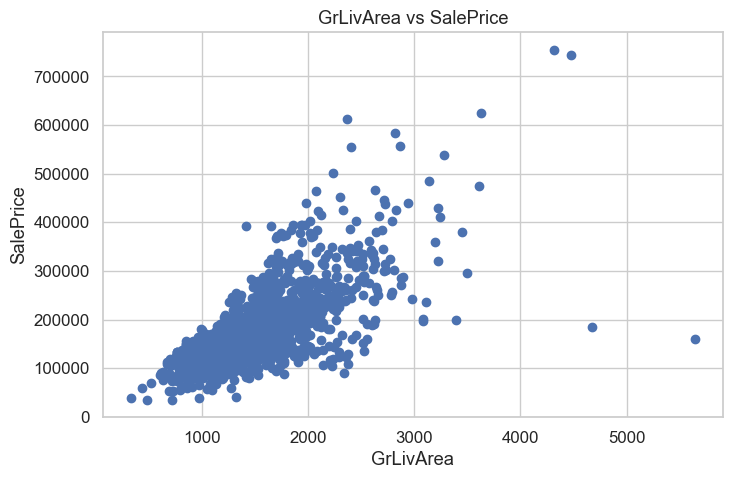

In [3280]:
# Bivariate anaysis with sales price (target variable/reponse variable)
# Bivariate analysis of these top 10 correlated variables with saleprice using pairplot
plt.scatter(clean_df.GrLivArea, clean_df.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

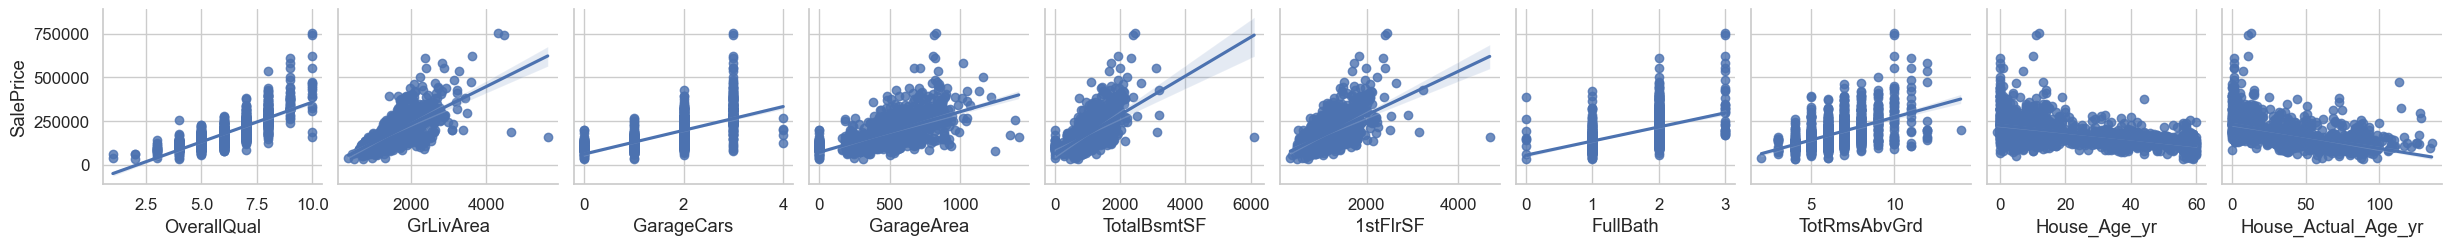

In [3281]:
sns.pairplot(clean_df, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

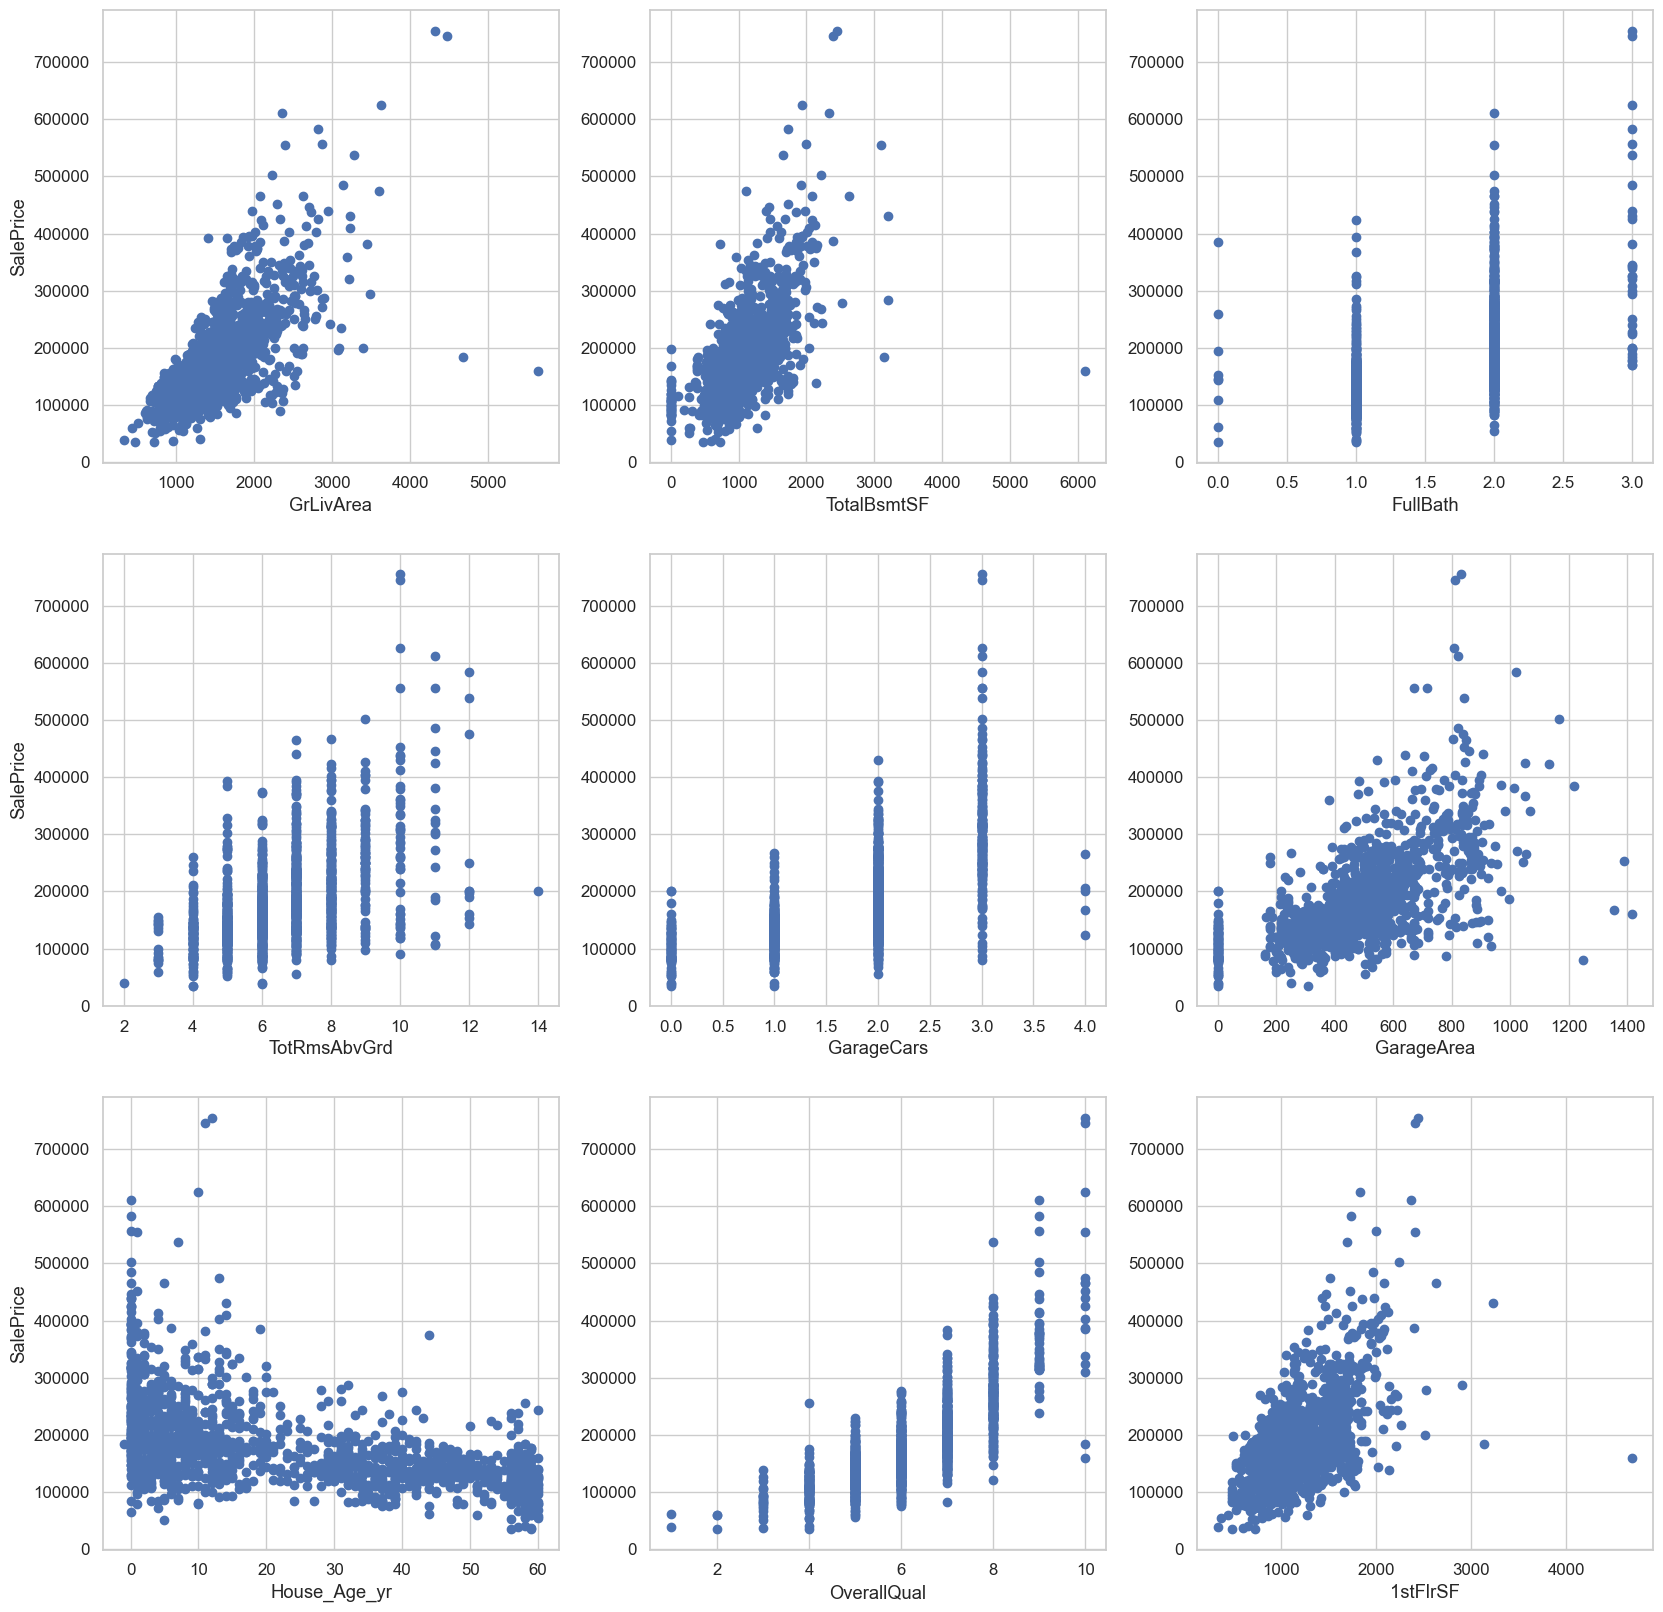

In [3282]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(clean_df.GrLivArea, clean_df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(clean_df.TotalBsmtSF, clean_df.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(clean_df.FullBath, clean_df.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(clean_df.TotRmsAbvGrd, clean_df.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(clean_df.GarageCars, clean_df.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(clean_df.GarageArea, clean_df.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(clean_df.House_Age_yr, clean_df.SalePrice)
plt.xlabel('House_Age_yr')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(clean_df.OverallQual, clean_df.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(clean_df['1stFlrSF'], clean_df.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

In [3283]:
# Categorical columns
categorical = clean_df.select_dtypes(include=['object']) 
cat_features =categorical.columns
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [3284]:
def sns_countplot(features):
    plt.figure(figsize=(16, 8))
    for i in range(1,len(features)+1):
        plt.subplot(2,4,i)
        plt.xticks(rotation=90)
        sns.countplot(x = features[i-1], data = raw_df)    
    plt.show()

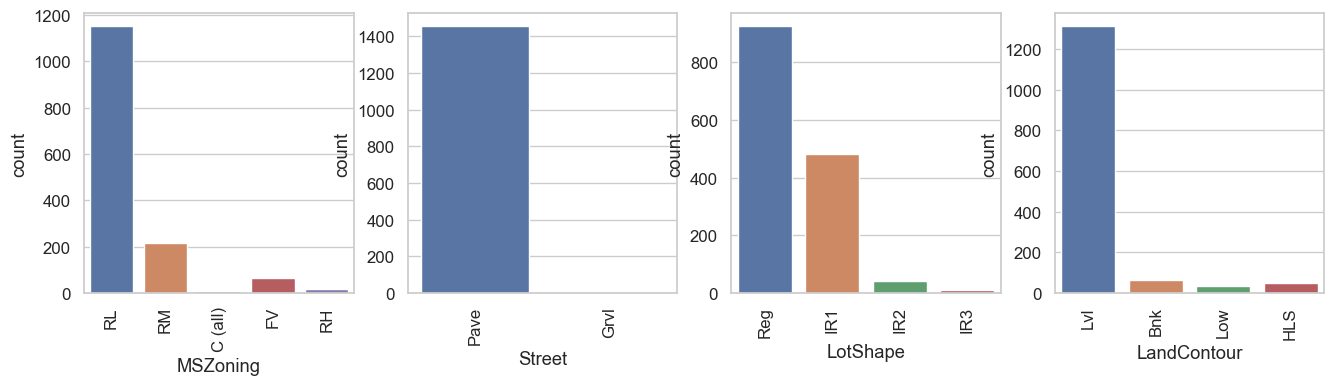

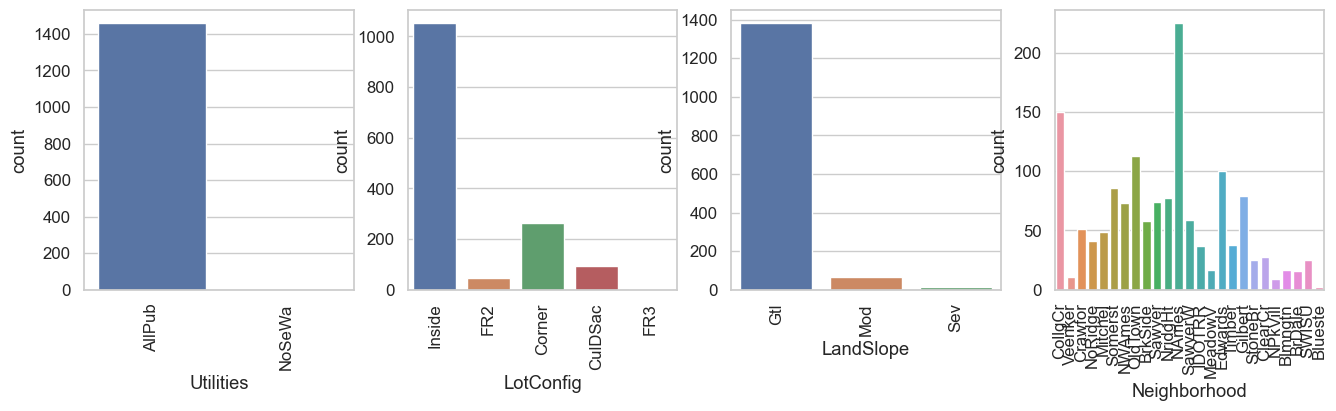

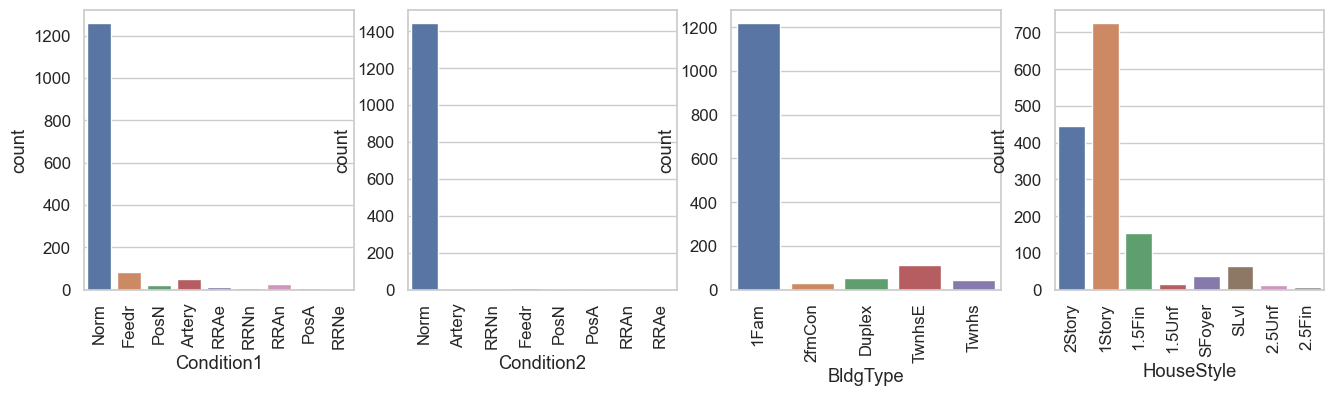

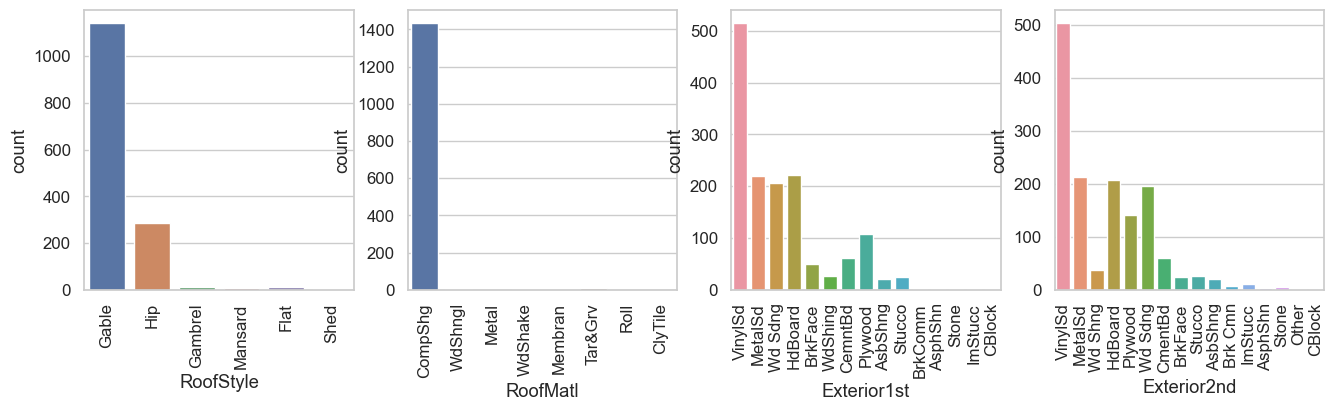

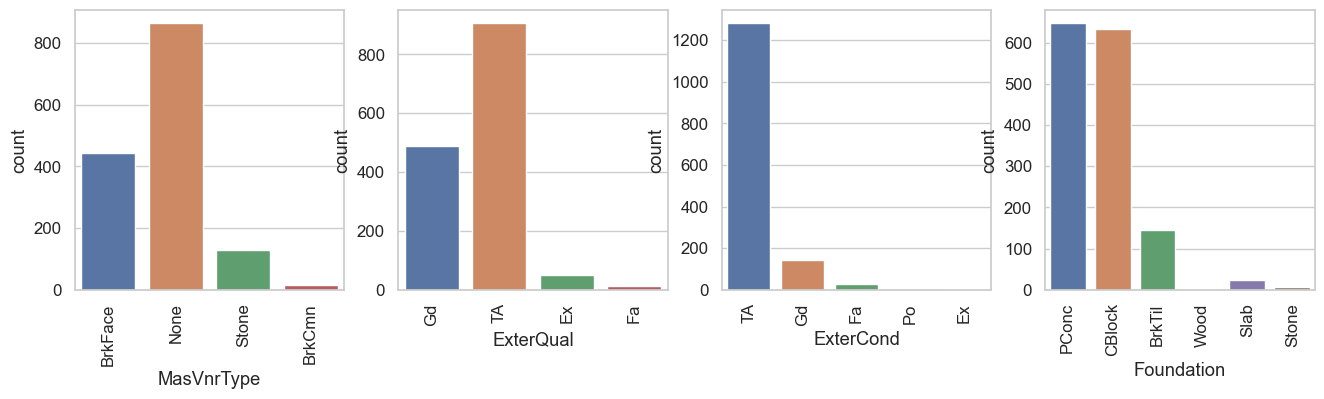

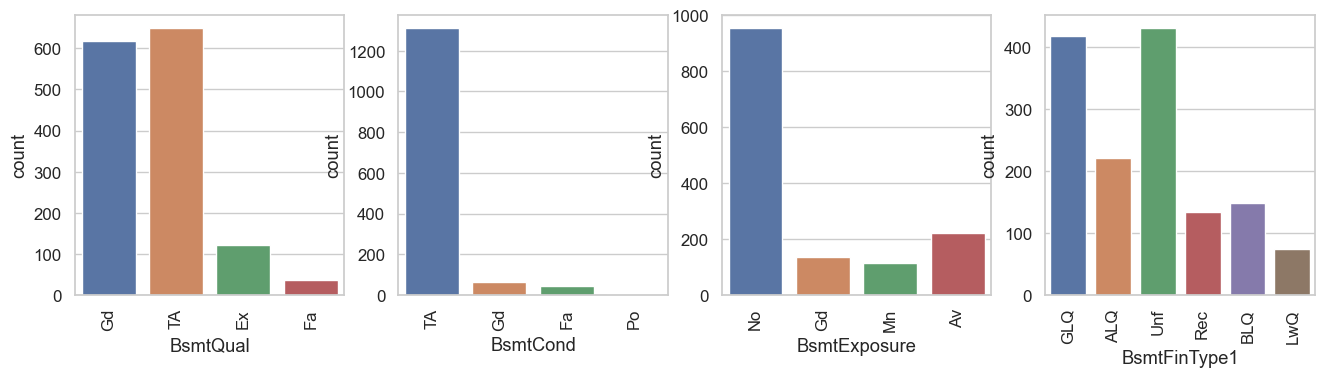

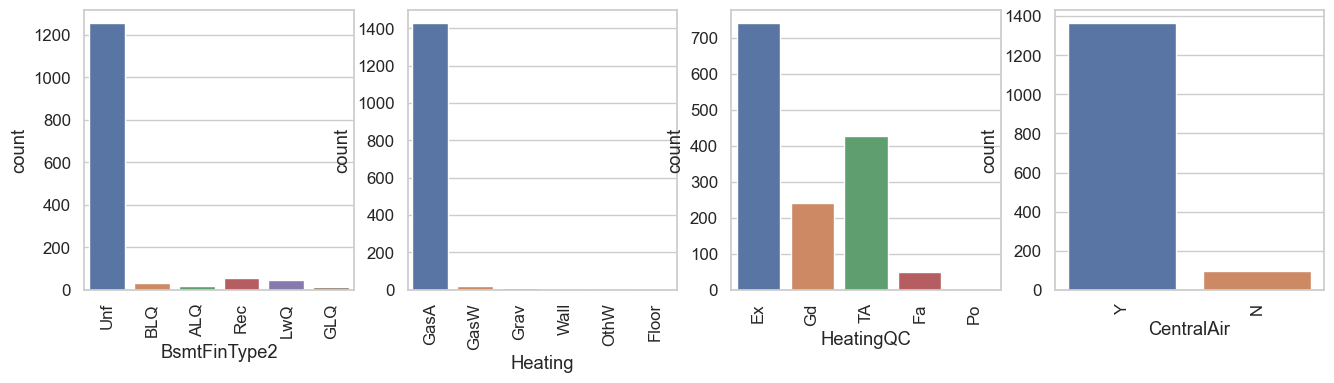

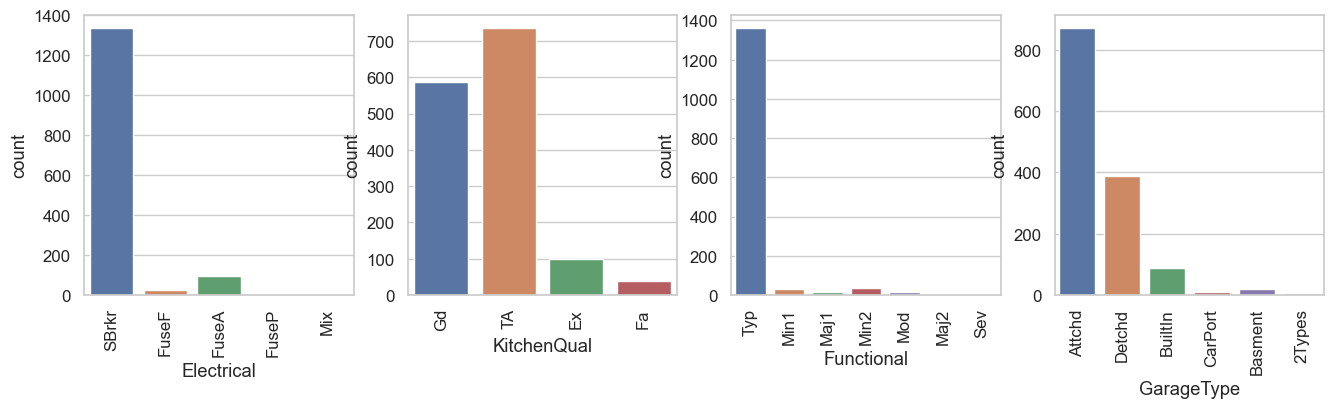

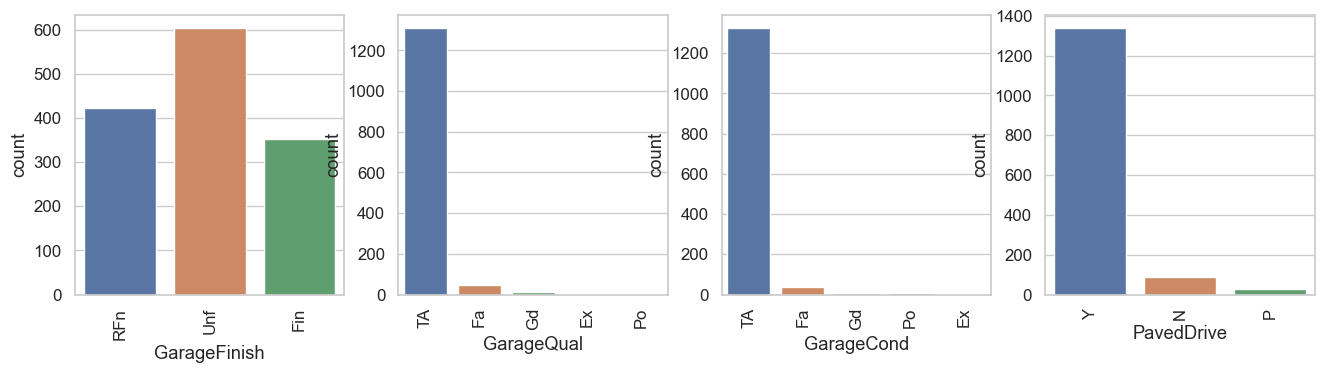

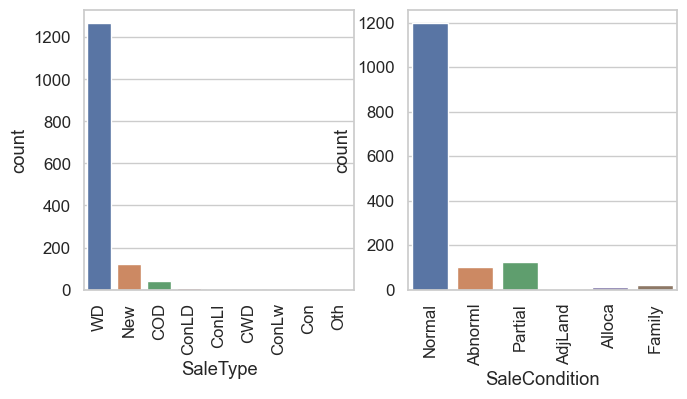

In [3285]:
# Plot categorical features to see if this skewed
sns_countplot(cat_features[0:4])
sns_countplot(cat_features[4:8])
sns_countplot(cat_features[8:12])
sns_countplot(cat_features[12:16])
sns_countplot(cat_features[16:20])
sns_countplot(cat_features[20:24])
sns_countplot(cat_features[24:28])
sns_countplot(cat_features[28:32])
sns_countplot(cat_features[32:36])
sns_countplot(cat_features[36:])

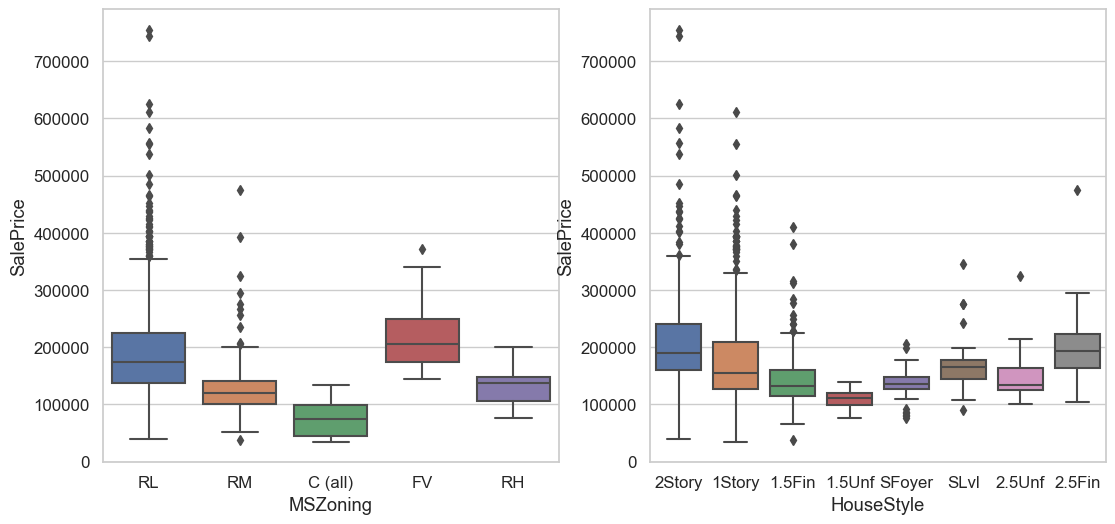

In [3286]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=clean_df)
plt.subplot(3,3,2)
sns.boxplot(x='HouseStyle', y="SalePrice", data=clean_df)
plt.show()

### Summary:

Inferences: 
Based on the correlation we can make few following interpretions
- SalePrice is very high positively correlated  with below predictors :
    - Overall Quality
    - GrLivArea
    - TotalBsmtSF
    - GarageCars
    - GarageAre
    - 1stFlrSF 
    - TotalBsmtSF
    - FullBath
    - TotRmsAbvGrd
- SalePrice is very high negatively correlated with House_Age_Yr

- MsZoning 'Fv' has high Saleprice and 'C' has most least sale price
- There is highest SalePrice when :
    - The house with Exterior Quality of type Execellent.
    - The house with Basement Quality of type Execellent.
    - The house with Kitchen Quality of type Execellent.
    - The house with Garage Quality of type Execellent.
    - The house with Garage Type of type BuiltIn.

## Data preparation for modeling

##### We need to predict sales price, this is the response variable, so we need to find predictors against sales price

-------------------Sales Price Describe------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
-------------------Sales Price Distribution--------------------


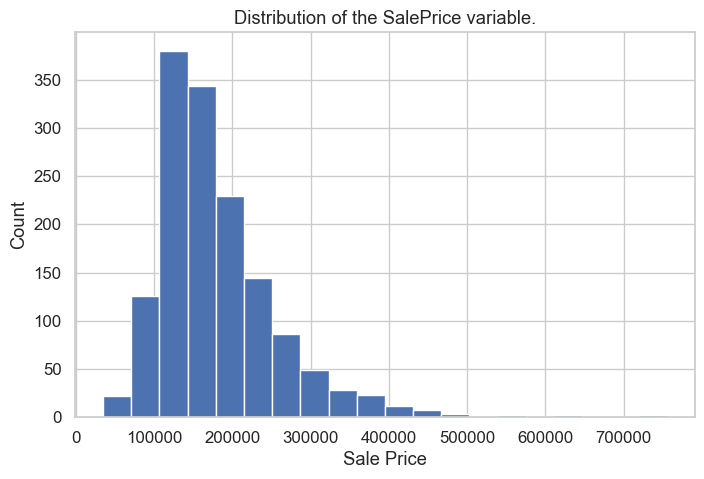

In [3287]:
print('-------------------Sales Price Describe------------------------')
print(clean_df.SalePrice.describe())

print('-------------------Sales Price Distribution--------------------')
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(clean_df.SalePrice, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 180921.20 and sigma = 79415.29



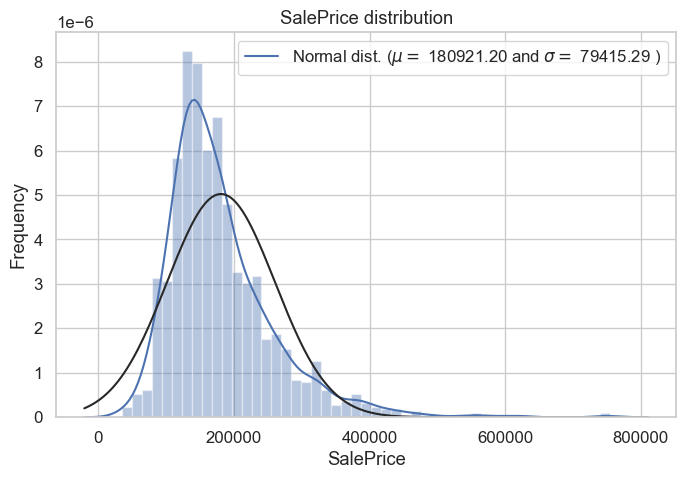

Skew SalesPrice: 1.882876


In [3288]:
sns.distplot(clean_df.SalePrice , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(clean_df.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()
print("Skew SalesPrice: %f" % clean_df.SalePrice.skew())

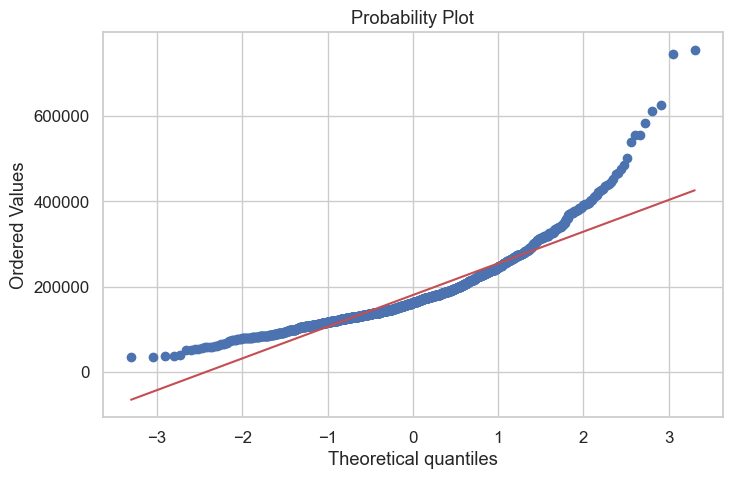

In [3289]:
# Probability plot before transformation
fig = plt.figure()
res = stats.probplot(clean_df.SalePrice, plot=plt)
plt.show()

Skew Value: 0.121335


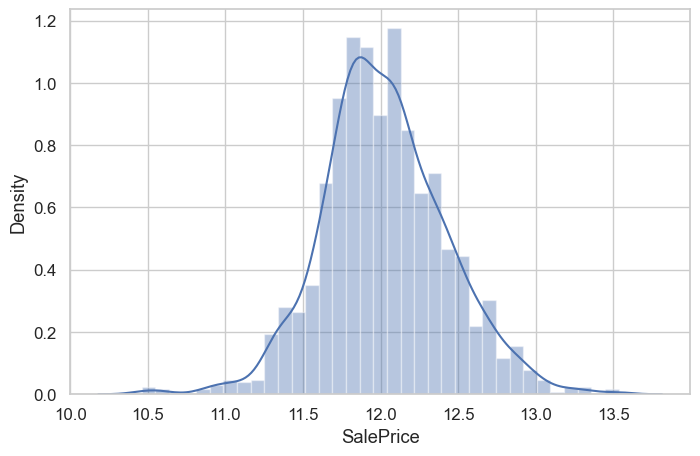

In [3290]:
#The dependent variable SalePrice is left skewed. So doing a log tranformation to form normal distribution.

clean_df.SalePrice=np.log(clean_df.SalePrice)

sns.distplot(clean_df.SalePrice)
print("Skew Value: %f" % clean_df.SalePrice.skew())

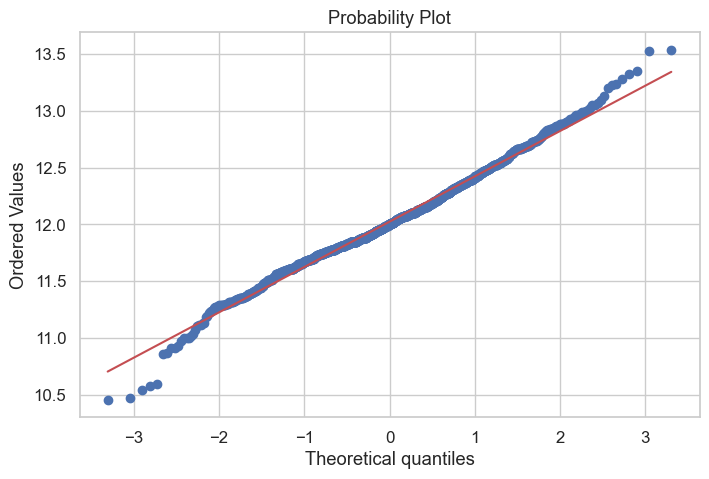

In [3291]:
#Probability plot after transformation
fig = plt.figure()
res = stats.probplot(clean_df.SalePrice, plot=plt)
plt.show()

In [3292]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})


clean_df['ExterQual'] = clean_df[['ExterQual']].apply(map_function)
clean_df['ExterCond'] = clean_df[['ExterCond']].apply(map_function)
clean_df['BsmtQual'] = clean_df[['BsmtQual']].apply(map_function)
clean_df['BsmtCond'] = clean_df[['BsmtCond']].apply(map_function)
clean_df['BsmtExposure'] = clean_df[['BsmtExposure']].apply(map_function1)
clean_df['BsmtFinType1'] = clean_df[['BsmtFinType1']].apply(map_function2)
clean_df['BsmtFinType2'] = clean_df[['BsmtFinType2']].apply(map_function2)
clean_df['HeatingQC'] = clean_df[['HeatingQC']].apply(map_function)
clean_df['KitchenQual'] = clean_df[['KitchenQual']].apply(map_function)
clean_df['GarageFinish'] = clean_df[['GarageFinish']].apply(map_function3)

In [3293]:
print("Shape before form dummies variable: ",clean_df.shape)
columns_to_dummy=['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']
dummy = pd.get_dummies(clean_df[columns_to_dummy], drop_first=True)
clean_df = pd.concat([clean_df, dummy], axis=1)
print("Shape after form dummies variable: ", clean_df.shape)
clean_df.head()

Shape before form dummies variable:  (1460, 73)
Shape after form dummies variable:  (1460, 218)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [3294]:
# # Dropping the columns whose dummies have been created and Highly skewed variables should be droped, as per above plots there are below features which are highly skewed
skewedCols = ['ExterQual', 'BsmtFinType1', 'BsmtQual', 'BsmtExposure', 'Functional', 'GarageQual', 'GarageCond', 'SaleType', 'CentralAir', 'Heating', 'ExterCond', 'RoofMatl', 'LandSlope', 'LandContour', 'Electrical', 'BsmtFinType2', 'PavedDrive', 'BsmtCond', 'Utilities', 'Street', 'Condition1', 'Condition2']
columns_to_drop =list(set(columns_to_dummy) | set(skewedCols))
clean_df.drop(columns_to_drop, axis=1,inplace=True)
clean_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,5,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,5,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,5,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,4,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,5,...,0,0,0,0,1,0,0,0,1,0


#### Train - Test Split Dataset

In [3295]:
train_data, test_data = train_test_split(clean_df, train_size= 0.7, random_state=100)
print("Shape of train dataset: ", train_data.shape)
print("Shape of test dataset: ", test_data.shape)

Shape of train dataset:  (1021, 181)
Shape of test dataset:  (439, 181)


In [3296]:
#X_train, y_train
print('---------------Train Data----------------------')
Ytrain = train_data.pop("SalePrice")
Xtrain = train_data
print("Response variables shape: ", Ytrain.shape)
print("Predictators shape: ", Xtrain.shape)
#XTest, YTest
print('---------------Test Data-----------------------')
Ytest = test_data.pop("SalePrice")
Xtest = test_data
print("Response shape: ", Ytest.shape)
print("Dependent variables shape: ", Xtest.shape)

---------------Train Data----------------------
Response variables shape:  (1021,)
Predictators shape:  (1021, 180)
---------------Test Data-----------------------
Response shape:  (439,)
Dependent variables shape:  (439, 180)


In [3297]:
# Rescalling the numeric variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_variables = Xtrain.dtypes[Xtrain.dtypes != "object"].index
Xtrain[num_variables] = scaler.fit_transform(Xtrain[num_variables])
Xtrain.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.000000,0.154110,0.220458,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.000000,0.274401,0.120295,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
986,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.000000,0.207620,0.079378,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1416,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.000000,0.332620,0.127169,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
390,0.099315,0.032409,0.444444,0.875,0.00,0.042700,0.265265,0.098031,0.140917,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3298]:
Xtest[num_variables] = scaler.transform(Xtest[num_variables])

In [3299]:
Xtest

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.333333,0.625,0.00000,0.109142,0.000000,0.106164,0.141408,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
57,0.232877,0.047566,0.666667,0.500,0.00000,0.000000,0.000000,0.368151,0.140753,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
780,0.143836,0.029930,0.666667,0.500,0.02375,0.000000,0.000000,0.529538,0.202455,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
382,0.198630,0.036338,0.666667,0.500,0.00000,0.000000,0.000000,0.401969,0.153682,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1170,0.188356,0.039309,0.555556,0.625,0.00000,0.092488,0.000000,0.245719,0.179378,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.126712,0.022936,0.444444,0.625,0.00000,0.000000,0.000000,0.425086,0.162520,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
399,0.150685,0.031099,0.666667,0.500,0.06250,0.143870,0.000000,0.119863,0.178723,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
545,0.164384,0.057820,0.666667,0.500,0.11125,0.177534,0.137042,0.000000,0.197054,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
266,0.167808,0.045517,0.555556,0.500,0.00000,0.126506,0.000000,0.037671,0.131260,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Regularization
#### Ridge and Lasso Regression

Ridge Regression

In [3300]:
# Tune hyperparameter
ridge_params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = ridge_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Xtrain, Ytrain) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3301]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013535,0.004815,0.001700,0.003156,0.001,{'alpha': 0.001},-0.084258,-0.095539,-0.100434,-0.093430,...,-0.092668,0.005455,2,-0.063010,-0.062916,-0.061491,-0.065495,-0.061837,-0.062950,0.001404
1,0.008196,0.000211,0.002603,0.003347,0.01,{'alpha': 0.01},-0.084130,-0.095402,-0.101231,-0.090077,...,-0.091812,0.005942,1,-0.063914,-0.062972,-0.062157,-0.066026,-0.062787,-0.063571,0.001350
2,0.012145,0.003318,0.003662,0.004543,0.5,{'alpha': 0.5},-0.091965,-0.097480,-0.106147,-0.082597,...,-0.094689,0.007656,3,-0.076064,-0.066373,-0.071653,-0.078083,-0.076211,-0.073677,0.004219
3,0.009272,0.001951,0.003205,0.003925,1.0,{'alpha': 1.0},-0.091512,-0.098928,-0.105290,-0.083381,...,-0.095040,0.007344,4,-0.078926,-0.068857,-0.073803,-0.080475,-0.078760,-0.076164,0.004288
4,0.010258,0.003280,0.001585,0.003169,10.0,{'alpha': 10.0},-0.091397,-0.109010,-0.108317,-0.091843,...,-0.101448,0.008061,5,-0.092723,-0.084818,-0.087039,-0.092564,-0.091020,-0.089633,0.003162
5,0.008124,0.000178,0.004817,0.003933,50,{'alpha': 50},-0.110384,-0.130727,-0.123768,-0.112261,...,-0.122054,0.009305,6,-0.118143,-0.112397,-0.113416,-0.117442,-0.115413,-0.115362,0.002220
6,0.007997,0.005060,0.001645,0.003290,100,{'alpha': 100},-0.127275,-0.145838,-0.137203,-0.126405,...,-0.137431,0.009638,7,-0.135152,-0.129929,-0.131216,-0.134683,-0.131816,-0.132559,0.002025
7,0.007731,0.004643,0.004800,0.003919,500,{'alpha': 500},-0.181348,-0.187745,-0.180912,-0.175140,...,-0.185494,0.009313,8,-0.184018,-0.182135,-0.184382,-0.184636,-0.181151,-0.183264,0.001374
8,0.008351,0.000377,0.002611,0.003331,1000,{'alpha': 1000},-0.212775,-0.214861,-0.208126,-0.200922,...,-0.213694,0.010234,9,-0.212492,-0.211137,-0.213893,-0.213939,-0.209870,-0.212266,0.001582


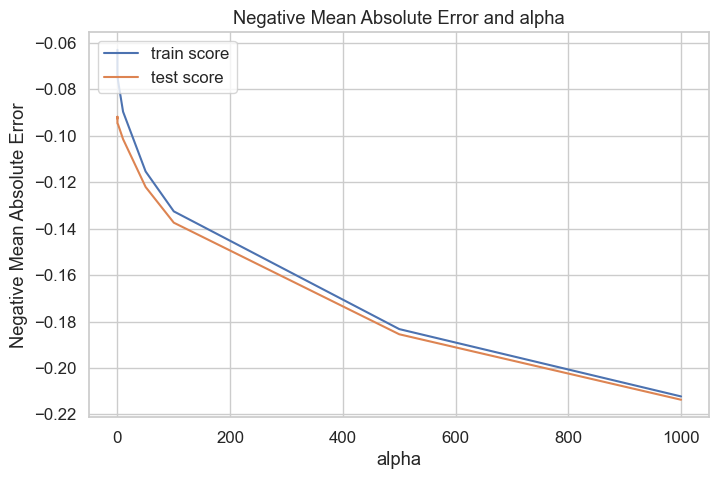

In [3302]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [3303]:
#optimum alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(Xtrain, Ytrain)
ridge.coef_

array([ 1.94415961e-02,  5.64963089e-02,  3.28093207e-01,  1.71941250e-01,
        4.97265243e-02,  1.09582693e-01,  3.54127625e-02,  3.31036383e-02,
        1.22424424e-01,  5.26731695e-02,  1.75487934e-01,  1.41028022e-01,
       -6.63451903e-05,  2.01632701e-01,  1.63257650e-01,  2.39929636e-02,
        1.32027276e-01,  6.47493101e-02,  7.19387418e-02, -5.92787944e-02,
        1.32453517e-01,  1.71904880e-01,  1.43433650e-01, -7.31276149e-03,
        5.16330282e-02,  1.74247519e-01,  1.38440085e-01,  8.91397134e-02,
        2.34543200e-02,  2.91714685e-02,  3.70122465e-02,  5.50336917e-02,
       -2.91383757e-02, -5.51677353e-03, -8.89314814e-02, -8.85758610e-02,
        5.38633782e-02,  4.69141404e-02,  8.07810534e-02,  2.70796575e-02,
        2.28117178e-02,  2.81613031e-02, -3.54215759e-02, -8.64680010e-03,
        4.25234820e-02,  5.24608518e-02,  3.12173676e-02, -1.55158419e-02,
        5.06731912e-02, -2.83963402e-02, -9.60212459e-03, -3.03282289e-03,
        3.57891258e-02,  

In [3304]:
print(ridge.score(Xtrain,Ytrain))
print(ridge.score(Xtest,Ytest))

0.897965123607899
0.8738708902765001


In [3305]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = raw_df.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.854),
 ('Id', -0.101),
 ('MSSubClass', -0.1),
 ('MSZoning', -0.095),
 ('LotFrontage', -0.089),
 ('LotArea', -0.089),
 ('Street', -0.08),
 ('Alley', -0.07),
 ('LotShape', -0.059),
 ('LandContour', -0.055),
 ('Utilities', -0.051),
 ('LotConfig', -0.05),
 ('LandSlope', -0.047),
 ('Neighborhood', -0.035),
 ('Condition1', -0.035),
 ('Condition2', -0.035),
 ('BldgType', -0.034),
 ('HouseStyle', -0.033),
 ('OverallQual', -0.032),
 ('OverallCond', -0.031),
 ('YearBuilt', -0.029),
 ('YearRemodAdd', -0.029),
 ('RoofStyle', -0.028),
 ('RoofMatl', -0.026),
 ('Exterior1st', -0.026),
 ('Exterior2nd', -0.025),
 ('MasVnrType', -0.025),
 ('MasVnrArea', -0.025),
 ('ExterQual', -0.024),
 ('ExterCond', -0.024),
 ('Foundation', -0.021),
 ('BsmtQual', -0.018),
 ('BsmtCond', -0.017),
 ('BsmtExposure', -0.016),
 ('BsmtFinType1', -0.014),
 ('BsmtFinSF1', -0.014),
 ('BsmtFinType2', -0.013),
 ('BsmtFinSF2', -0.013),
 ('BsmtUnfSF', -0.012),
 ('TotalBsmtSF', -0.011),
 ('Heating', -0.011),
 ('Heati

In [3306]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.01}

#### Lasso Regression

In [3307]:
lasso_params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Xtrain, Ytrain) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [3308]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060477,0.006645,0.006413,0.003207,0.00006,{'alpha': 6e-05},0.903270,0.685286,0.825745,0.767718,...,0.821655,0.088458,6,0.948924,0.951251,0.950273,0.946188,0.946089,0.948545,0.002099
1,0.013491,0.004610,0.001603,0.003207,0.0006,{'alpha': 0.0006},0.899919,0.746555,0.842815,0.909814,...,0.859467,0.061156,3,0.905796,0.931554,0.913827,0.904865,0.902045,0.911618,0.010709
2,0.008116,0.000057,0.008130,0.000379,0.0008,{'alpha': 0.0008},0.898588,0.760711,0.843820,0.909267,...,0.861466,0.055221,2,0.899445,0.925920,0.908654,0.898669,0.895672,0.905672,0.011015
3,0.010260,0.003115,0.000507,0.001013,0.001,{'alpha': 0.001},0.896779,0.771505,0.843747,0.908322,...,0.862037,0.050304,1,0.893984,0.920234,0.904238,0.892363,0.888732,0.899910,0.011392
4,0.007762,0.000661,0.001600,0.003200,0.002,{'alpha': 0.002},0.888627,0.795232,0.833478,0.895371,...,0.855095,0.037031,4,0.875707,0.896080,0.884793,0.871649,0.869773,0.879601,0.009731


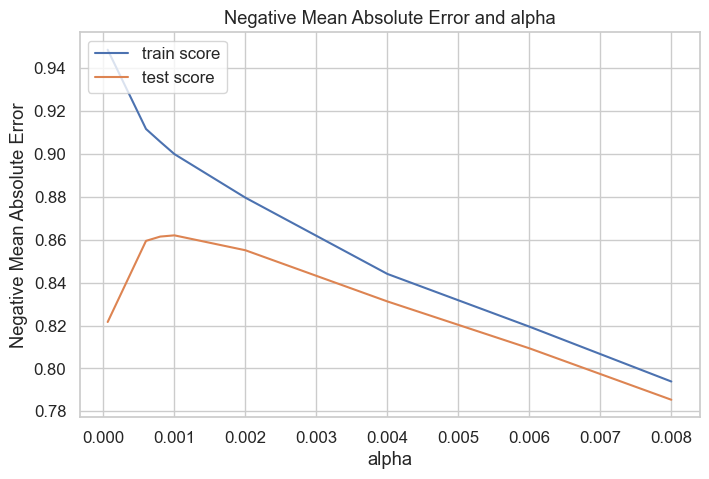

In [3309]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [3310]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060477,0.006645,0.006413,0.003207,0.00006,{'alpha': 6e-05},0.903270,0.685286,0.825745,0.767718,...,0.821655,0.088458,6,0.948924,0.951251,0.950273,0.946188,0.946089,0.948545,0.002099
1,0.013491,0.004610,0.001603,0.003207,0.0006,{'alpha': 0.0006},0.899919,0.746555,0.842815,0.909814,...,0.859467,0.061156,3,0.905796,0.931554,0.913827,0.904865,0.902045,0.911618,0.010709
2,0.008116,0.000057,0.008130,0.000379,0.0008,{'alpha': 0.0008},0.898588,0.760711,0.843820,0.909267,...,0.861466,0.055221,2,0.899445,0.925920,0.908654,0.898669,0.895672,0.905672,0.011015
3,0.010260,0.003115,0.000507,0.001013,0.001,{'alpha': 0.001},0.896779,0.771505,0.843747,0.908322,...,0.862037,0.050304,1,0.893984,0.920234,0.904238,0.892363,0.888732,0.899910,0.011392
4,0.007762,0.000661,0.001600,0.003200,0.002,{'alpha': 0.002},0.888627,0.795232,0.833478,0.895371,...,0.855095,0.037031,4,0.875707,0.896080,0.884793,0.871649,0.869773,0.879601,0.009731


In [3311]:
#optimum alpha
alpha =0.00006
lasso = Lasso(alpha=alpha)
lasso.fit(Xtrain, Ytrain) 
lasso.coef_

array([ 4.05336257e-02,  3.60365329e-01,  4.64527308e-01,  3.33042888e-01,
        2.90293095e-02,  3.24220170e-01,  6.99671722e-03, -0.00000000e+00,
        4.48313298e-01,  2.82190075e-02,  1.77904333e-01,  9.55671316e-02,
       -4.09277137e-02,  1.04747676e+00,  1.36531334e-01,  2.33710398e-02,
        2.41442285e-02,  2.19489433e-02,  3.84612575e-03, -1.42632352e-01,
        4.96834480e-02,  7.12712747e-02,  7.25005350e-02,  9.41840509e-04,
        2.38731897e-02,  1.55300470e-01,  9.15628923e-02,  7.37474466e-02,
        3.13596241e-02,  5.76415249e-02,  8.24932304e-02,  6.90937630e-02,
       -3.25727539e-02, -0.00000000e+00, -4.60764807e-02, -2.67802578e-01,
        3.55272660e-01,  3.66684094e-01,  3.61843377e-01,  3.10511258e-01,
        7.56384248e-02,  2.07474012e-02, -2.57148577e-02,  6.28096284e-03,
        2.39321743e-02,  3.24929205e-02,  2.36311000e-02, -6.54846449e-02,
        4.20713382e-02, -2.05020054e-02, -0.00000000e+00, -0.00000000e+00,
        2.86064784e-02, -

In [3312]:
print(lasso.score(Xtrain,Ytrain))
print(lasso.score(Xtest,Ytest))

0.9444867153088153
0.879317310572314


In [3313]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = raw_df.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 8.48),
 ('Id', -1.406),
 ('MSSubClass', -0.268),
 ('MSZoning', -0.176),
 ('LotFrontage', -0.143),
 ('LotArea', -0.118),
 ('Street', -0.097),
 ('Alley', -0.073),
 ('LotShape', -0.065),
 ('LandContour', -0.058),
 ('Utilities', -0.054),
 ('LotConfig', -0.048),
 ('LandSlope', -0.046),
 ('Neighborhood', -0.046),
 ('Condition1', -0.043),
 ('Condition2', -0.042),
 ('BldgType', -0.041),
 ('HouseStyle', -0.034),
 ('OverallQual', -0.034),
 ('OverallCond', -0.033),
 ('YearBuilt', -0.033),
 ('YearRemodAdd', -0.029),
 ('RoofStyle', -0.029),
 ('RoofMatl', -0.027),
 ('Exterior1st', -0.026),
 ('Exterior2nd', -0.026),
 ('MasVnrType', -0.024),
 ('MasVnrArea', -0.022),
 ('ExterQual', -0.021),
 ('ExterCond', -0.02),
 ('Foundation', -0.02),
 ('BsmtQual', -0.018),
 ('BsmtCond', -0.017),
 ('BsmtExposure', -0.015),
 ('BsmtFinType1', -0.013),
 ('BsmtFinSF1', -0.013),
 ('BsmtFinType2', -0.012),
 ('BsmtFinSF2', -0.012),
 ('BsmtUnfSF', -0.009),
 ('TotalBsmtSF', -0.007),
 ('Heating', -0.005),
 ('Heat

In [3314]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

### Observed below score for Ridge and Lasso Regression


#### Ridge Regression Score:
    - Train Score : 0.897965123607899
    - Test Score : 0.8738708902765001

#### Lasso Regression Score:
    - Train Score : 0.9444867153088153
    - Test Score : 0.879317310572314

***** Lasso has done better with this dataset